In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Input, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose



In [2]:
champs_elysees=pd.read_csv('./datasets/Av_Champs_Elysees.csv',sep=';')
convention=pd.read_csv('./datasets/Convention.csv',sep=';')
sts=pd.read_csv('./datasets/Sts_Peres.csv',sep=';')

In [3]:
champs_elysees['Date et heure de comptage'] = pd.to_datetime(champs_elysees['Date et heure de comptage'],utc=True)
convention['Date et heure de comptage'] = pd.to_datetime(convention['Date et heure de comptage'],utc=True)
sts['Date et heure de comptage'] = pd.to_datetime(sts['Date et heure de comptage'],utc=True)


In [4]:
champs_elysees=champs_elysees.sort_values(by='Date et heure de comptage')
convention=convention.sort_values(by='Date et heure de comptage')
sts=sts.sort_values(by='Date et heure de comptage')

In [5]:
convention=convention[(convention['Libelle noeud amont']=='Convention-Blomet')&(convention['Libelle noeud aval']=='Lecourbe-Convention')]
sts=sts[(sts['Libelle noeud amont']=='Sts_Peres-Voltaire')&(sts['Libelle noeud aval']=='Sts_Peres-Universite')]

In [6]:
convention["Taux d'occupation"].mean()

3.207865349088165

### Preprocessing

In [23]:
df_champs=champs_elysees[["Date et heure de comptage","Taux d'occupation","Débit horaire"]]
df_convention=convention[["Date et heure de comptage","Taux d'occupation","Débit horaire"]]
df_sts=sts[["Date et heure de comptage","Taux d'occupation","Débit horaire"]]

In [24]:
df_champs['Date et heure de comptage']=pd.to_datetime(df_champs['Date et heure de comptage'])
df_champs.dropna(inplace=True)

df_convention['Date et heure de comptage']=pd.to_datetime(df_convention['Date et heure de comptage'])
df_convention.dropna(inplace=True)

df_sts['Date et heure de comptage']=pd.to_datetime(df_sts['Date et heure de comptage'])
df_sts.dropna(inplace=True)




C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\4157158756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs['Date et heure de comptage']=pd.to_datetime(df_champs['Date et heure de comptage'])
C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\4157158756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs.dropna(inplace=True)
C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\4157158756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [26]:


# Assuming 'Date et heure de comptage' is your datetime index
df_champs["Date et heure de comptage"] = pd.to_datetime(df_champs["Date et heure de comptage"])
df_champs['day_of_week'] = df_champs['Date et heure de comptage'].dt.day_name()
df_champs['week'] = df_champs['Date et heure de comptage'].dt.isocalendar().week

df_convention["Date et heure de comptage"] = pd.to_datetime(df_convention["Date et heure de comptage"])
df_convention['day_of_week'] = df_convention['Date et heure de comptage'].dt.day_name()
df_convention['week'] = df_convention['Date et heure de comptage'].dt.isocalendar().week

df_sts["Date et heure de comptage"] = pd.to_datetime(df_sts["Date et heure de comptage"])
df_sts['day_of_week'] = df_sts['Date et heure de comptage'].dt.day_name()
df_sts['week'] = df_sts['Date et heure de comptage'].dt.isocalendar().week

"""pivot_champs_debit = pd.pivot_table(df, values='Débit horaire', index='day_of_week', columns='week', aggfunc='mean')

# Reorder days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(days_order)

# Plot the pivot table
pivot.plot(figsize=(20, 6), marker='o')
plt.title('Weekly Débit Horaire')
plt.xlabel('Day of the Week')
plt.ylabel('Débit Horaire')
plt.legend(title='Week', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()"""


C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\1566795316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs["Date et heure de comptage"] = pd.to_datetime(df_champs["Date et heure de comptage"])
C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\1566795316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs['day_of_week'] = df_champs['Date et heure de comptage'].dt.day_name()
C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\1566795316.py:4: SettingWithCopyWarning: 
A value is trying 

"pivot_champs_debit = pd.pivot_table(df, values='Débit horaire', index='day_of_week', columns='week', aggfunc='mean')\n\n# Reorder days of the week\ndays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']\npivot = pivot.reindex(days_order)\n\n# Plot the pivot table\npivot.plot(figsize=(20, 6), marker='o')\nplt.title('Weekly Débit Horaire')\nplt.xlabel('Day of the Week')\nplt.ylabel('Débit Horaire')\nplt.legend(title='Week', bbox_to_anchor=(1, 1), loc='upper left')\nplt.show()"

In [27]:
df_champs.set_index('Date et heure de comptage',inplace=True)
df_convention.set_index('Date et heure de comptage',inplace=True)
df_sts.set_index('Date et heure de comptage',inplace=True)

In [28]:
avg_day_debit_champs={}
avg_day_taux_champs={}
avg_day_debit_convention={}
avg_day_taux_convention={}
avg_day_debit_sts={}
avg_day_taux_sts={}

for day in list(df_champs.day_of_week.unique()):
    avg_day_debit_champs[day]=df_champs[df_champs.day_of_week==day]['Débit horaire'].mean()
    avg_day_taux_champs[day]=df_champs[df_champs.day_of_week==day]["Taux d'occupation"].mean()
    avg_day_debit_convention[day]=df_convention[df_convention.day_of_week==day]['Débit horaire'].mean()
    avg_day_taux_convention[day]=df_convention[df_convention.day_of_week==day]["Taux d'occupation"].mean()
    avg_day_debit_sts[day]=df_sts[df_sts.day_of_week==day]['Débit horaire'].mean()
    avg_day_taux_sts[day]=df_sts[df_sts.day_of_week==day]["Taux d'occupation"].mean()

df_avg_day_debit_champs=pd.DataFrame(list(avg_day_debit_champs.items()),columns=['day_of_week','avg_debit'])
df_avg_day_taux_champs=pd.DataFrame(list(avg_day_taux_champs.items()),columns=['day_of_week','avg_taux'])
df_avg_day_debit_convention=pd.DataFrame(list(avg_day_debit_convention.items()),columns=['day_of_week','avg_debit'])
df_avg_day_taux_convention=pd.DataFrame(list(avg_day_taux_convention.items()),columns=['day_of_week','avg_taux'])
df_avg_day_debit_sts=pd.DataFrame(list(avg_day_debit_sts.items()),columns=['day_of_week','avg_debit'])
df_avg_day_taux_sts=pd.DataFrame(list(avg_day_taux_sts.items()),columns=['day_of_week','avg_taux'])

In [11]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_avg_day_debit_champs['day_of_week'] = pd.Categorical(df_avg_day_debit_champs['day_of_week'], categories=days_order, ordered=True)
df_avg_day_debit_champs = df_avg_day_debit_champs.sort_values('day_of_week')
df_avg_day_taux_champs['day_of_week'] = pd.Categorical(df_avg_day_taux_champs['day_of_week'], categories=days_order, ordered=True)
df_avg_day_taux_champs = df_avg_day_taux_champs.sort_values('day_of_week')

df_avg_day_debit_convention['day_of_week'] = pd.Categorical(df_avg_day_debit_convention['day_of_week'], categories=days_order, ordered=True)
df_avg_day_debit_convention = df_avg_day_debit_convention.sort_values('day_of_week')
df_avg_day_taux_convention['day_of_week'] = pd.Categorical(df_avg_day_taux_convention['day_of_week'], categories=days_order, ordered=True)
df_avg_day_taux_convention = df_avg_day_taux_convention.sort_values('day_of_week')

df_avg_day_debit_sts['day_of_week'] = pd.Categorical(df_avg_day_debit_sts['day_of_week'], categories=days_order, ordered=True)
df_avg_day_debit_sts = df_avg_day_debit_sts.sort_values('day_of_week')
df_avg_day_taux_sts['day_of_week'] = pd.Categorical(df_avg_day_taux_sts['day_of_week'], categories=days_order, ordered=True)
df_avg_day_taux_sts = df_avg_day_taux_sts.sort_values('day_of_week')


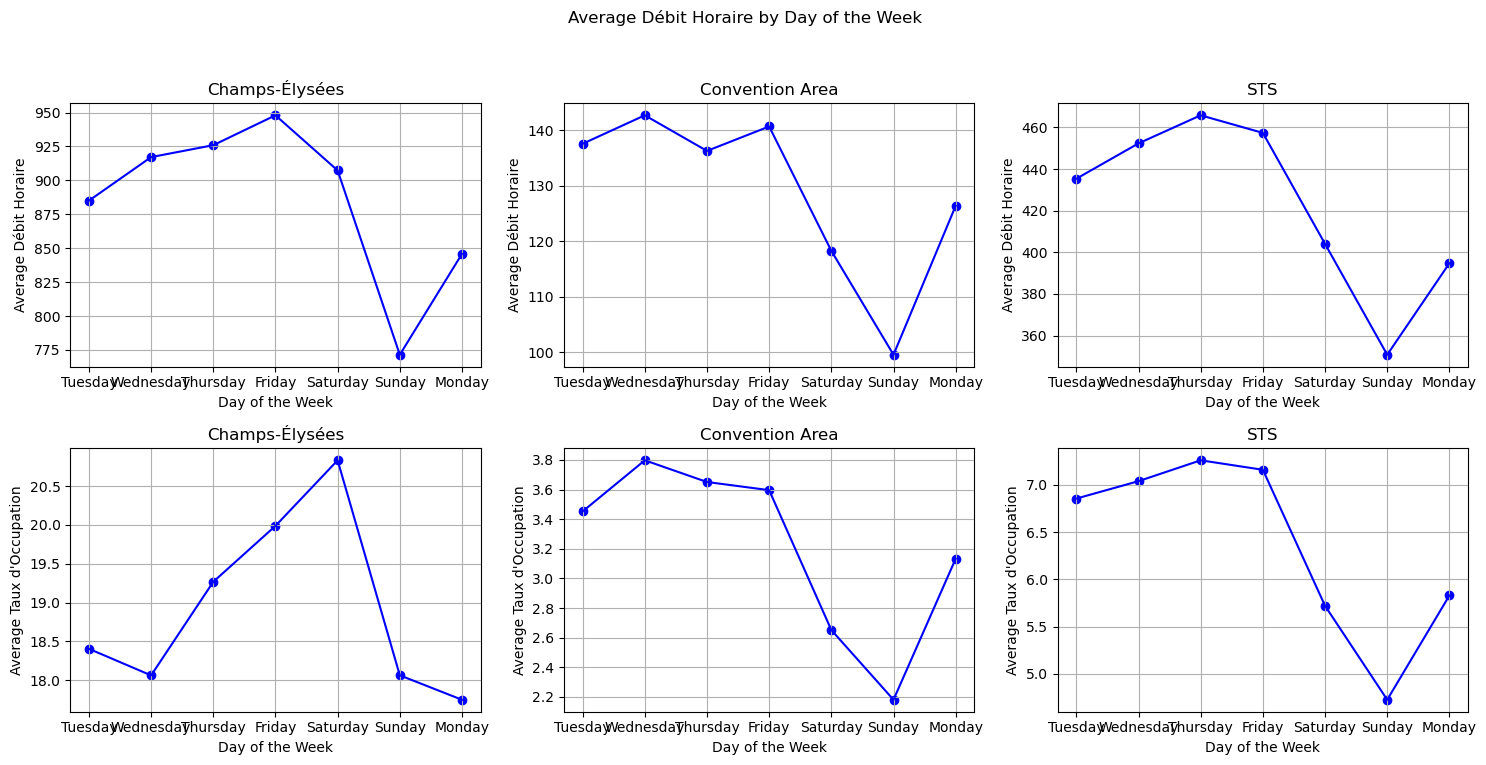

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set_palette('Blues')

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Average Débit Horaire by Day of the Week')

datasets_debit = [df_avg_day_debit_champs, df_avg_day_debit_convention, df_avg_day_debit_sts]
titles_debit = ['Champs-Élysées', 'Convention Area', 'STS']

for i in range(3):
    axs[0, i].scatter(datasets_debit[i]['day_of_week'], datasets_debit[i]['avg_debit'], color='blue')
    axs[0, i].plot(datasets_debit[i]['day_of_week'], datasets_debit[i]['avg_debit'], linestyle='-', color='blue')
    axs[0, i].set_title(titles_debit[i])
    axs[0, i].set_xlabel('Day of the Week')
    axs[0, i].set_ylabel('Average Débit Horaire')
    axs[0, i].grid(True)


datasets_taux = [df_avg_day_taux_champs, df_avg_day_taux_convention, df_avg_day_taux_sts]
titles_taux = ['Champs-Élysées', 'Convention Area', 'STS']

for i in range(3):
    axs[1, i].scatter(datasets_taux[i]['day_of_week'], datasets_taux[i]['avg_taux'], color='blue')
    axs[1, i].plot(datasets_taux[i]['day_of_week'], datasets_taux[i]['avg_taux'], linestyle='-', color='blue')
    axs[1, i].set_title(titles_taux[i])
    axs[1, i].set_xlabel('Day of the Week')
    axs[1, i].set_ylabel('Average Taux d\'Occupation')
    axs[1, i].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the subplot layout
plt.show()


In [31]:
df_champs

,Taux d'occupation,Débit horaire,day_of_week,week
Date et heure de comptage,,,,
2022-11-01 03:00:00+00:00,8.89223,672.0,Tuesday,44
2022-11-01 04:00:00+00:00,7.12889,513.0,Tuesday,44
2022-11-01 05:00:00+00:00,6.22500,494.0,Tuesday,44
2022-11-01 06:00:00+00:00,5.80723,513.0,Tuesday,44
2022-11-01 07:00:00+00:00,5.57111,484.0,Tuesday,44
...,...,...,...,...
2023-11-30 19:00:00+00:00,30.87000,1433.0,Thursday,48
2023-11-30 20:00:00+00:00,24.38111,1253.0,Thursday,48
2023-11-30 21:00:00+00:00,20.40723,1069.0,Thursday,48


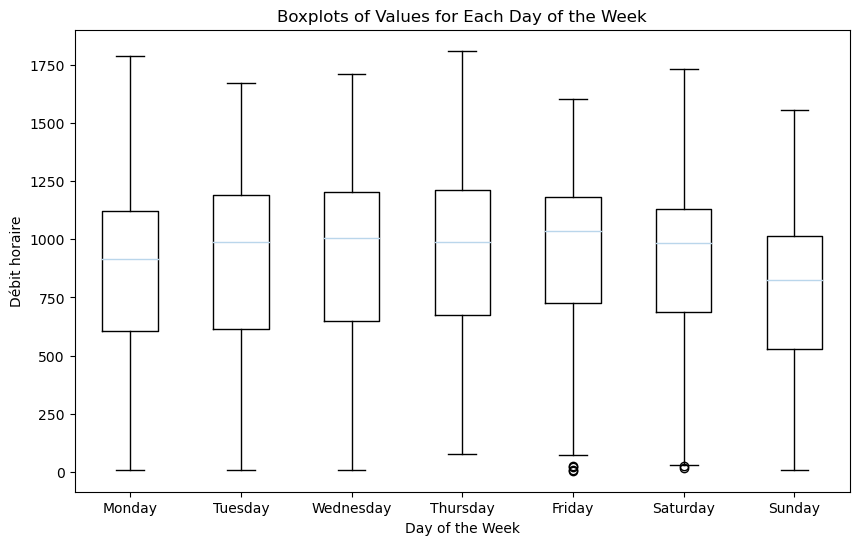

In [33]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_champs[df_champs['day_of_week'] == day]['Débit horaire'] for day in days_order], labels=days_order)
plt.title('Boxplots of Values for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Débit horaire')
plt.show()

In [34]:


daily_avg = df_champs['Débit horaire'].resample('D').mean()

# Filter days with average values beneath 400
days_below_500 = daily_avg[daily_avg < 400].index.strftime('%d-%b-%Y').tolist()

print("Days with average values beneath 400:", days_below_500)


Days with average values beneath 400: ['04-Jun-2023', '23-Jul-2023']


In [176]:
df_sts['month'] = df_sts.index.month
df_sts['year'] = df_sts.index.year
df_sts['hour'] = df_sts.index.hour

C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\1226132708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sts['month'] = df_sts.index.month
C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\1226132708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sts['year'] = df_sts.index.year
C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\1226132708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\3925521360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs['month'] = df_champs.index.month
C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\3925521360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs['year'] = df_champs.index.year
C:\Users\bacca\AppData\Local\Temp\ipykernel_12332\3925521360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

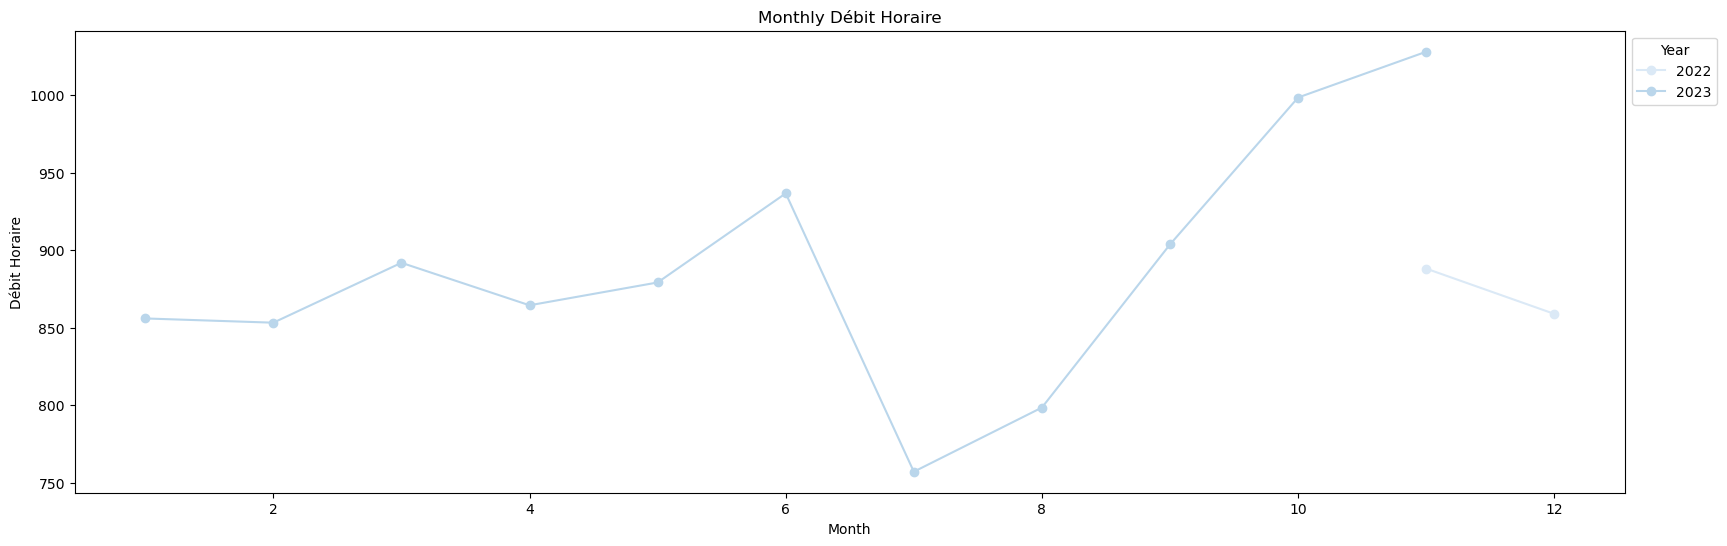

In [172]:

df_champs['month'] = df_champs.index.month
df_champs['year'] = df_champs.index.year
df_champs['hour'] = df_champs.index.hour

df_convention['month'] = df_convention.index.month
df_convention['year'] = df_convention.index.year
df_convention['hour'] = df_convention.index.hour


pivot = pd.pivot_table(df_champs, values='Débit horaire', index='month', columns='year', aggfunc='mean')

# Reorder months
months_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pivot = pivot.reindex(months_order)

pivot.plot(figsize=(20, 6), marker='o')
plt.title('Monthly Débit Horaire')
plt.xlabel('Month')
plt.ylabel('Débit Horaire')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


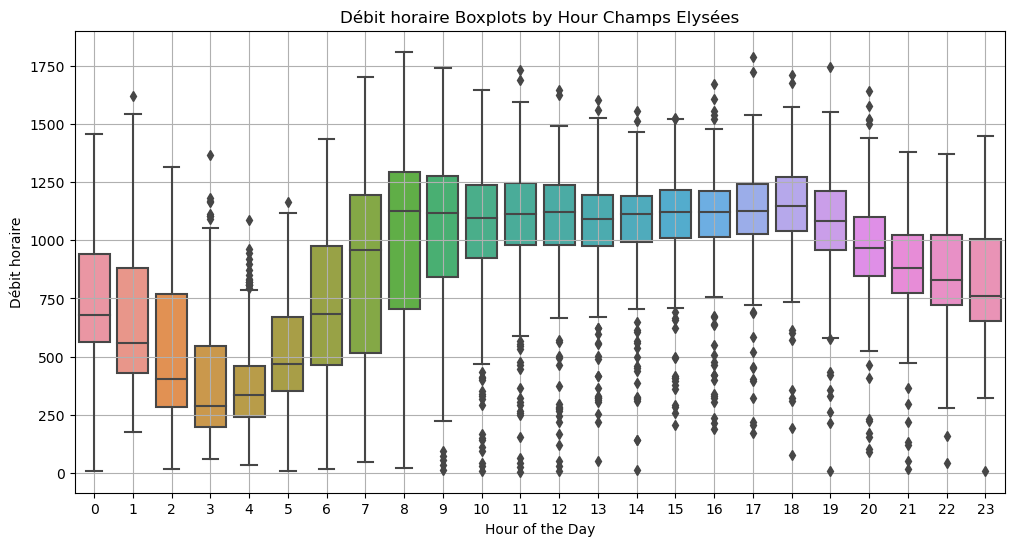

In [173]:
# Plotting boxplots for each hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Débit horaire', data=df_champs)
plt.title('Débit horaire Boxplots by Hour Champs Elysées')
plt.xlabel('Hour of the Day')
plt.ylabel('Débit horaire')
plt.grid(True)
plt.show()

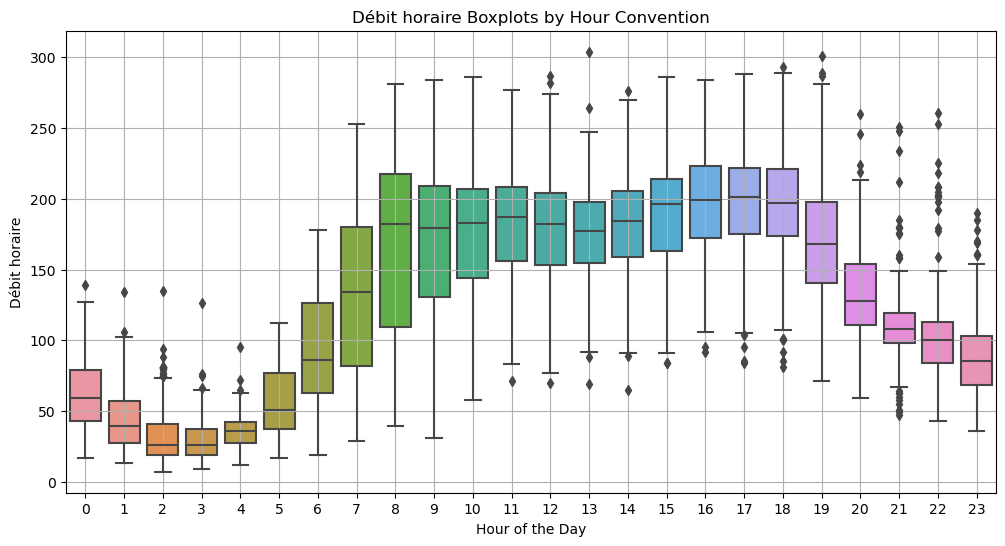

In [174]:
# Plotting boxplots for each hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Débit horaire', data=df_convention)
plt.title('Débit horaire Boxplots by Hour Convention')
plt.xlabel('Hour of the Day')
plt.ylabel('Débit horaire')
plt.grid(True)
plt.show()

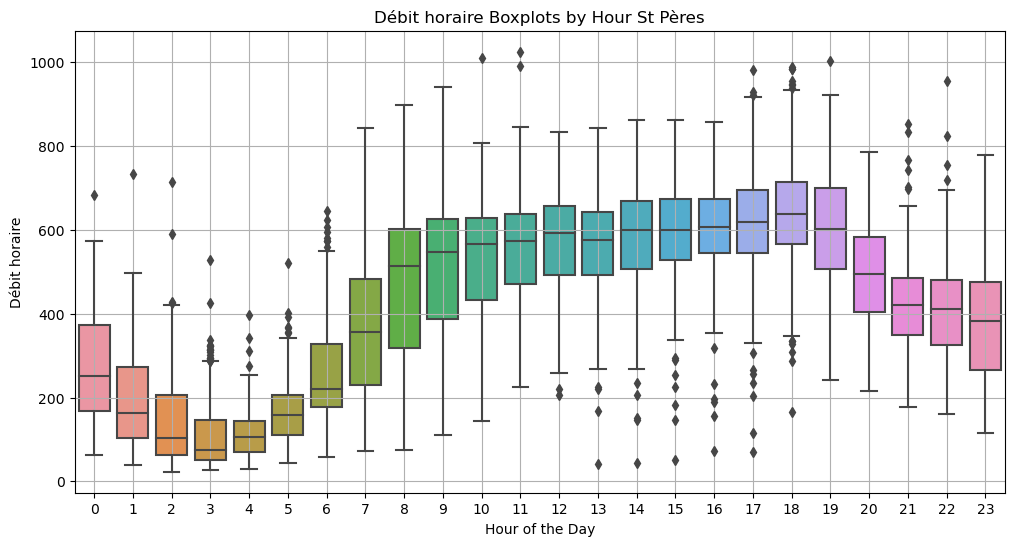

In [177]:
# Plotting boxplots for each hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Débit horaire', data=df_sts)
plt.title('Débit horaire Boxplots by Hour St Pères')
plt.xlabel('Hour of the Day')
plt.ylabel('Débit horaire')
plt.grid(True)
plt.show()

### Dropping outliers

We need further investigation (causes) before dropping them ( this will be done later)

In [158]:
list_outliers=[]
for hour in range(24):
    hour_data = df_champs[df_champs['hour'] == hour]['Débit horaire']

    q1 = np.percentile(hour_data, 25)
    q3 = np.percentile(hour_data, 75)
    iqr = q3 - q1

    #  whiskers
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    # Identify outliers
    outliers = list(hour_data[(hour_data < lower_whisker) | (hour_data > upper_whisker)].index)
    list_outliers+=outliers
    print(f'Outliers for hour {hour}:', outliers.index)


Outliers for hour 0: <built-in method index of list object at 0x000001D9E75CDE40>
Outliers for hour 1: <built-in method index of list object at 0x000001D9DBEA68C0>
Outliers for hour 2: <built-in method index of list object at 0x000001D9E08FF700>
Outliers for hour 3: <built-in method index of list object at 0x000001D9E759A840>
Outliers for hour 4: <built-in method index of list object at 0x000001D9E08FFCC0>
Outliers for hour 5: <built-in method index of list object at 0x000001D9E08FF9C0>
Outliers for hour 6: <built-in method index of list object at 0x000001D9CB22AE80>
Outliers for hour 7: <built-in method index of list object at 0x000001D9E08FFCC0>
Outliers for hour 8: <built-in method index of list object at 0x000001D9E75CD600>
Outliers for hour 9: <built-in method index of list object at 0x000001D9E08E1C00>
Outliers for hour 10: <built-in method index of list object at 0x000001D9E08FF9C0>
Outliers for hour 11: <built-in method index of list object at 0x000001D9E08FFCC0>
Outliers for h

In [161]:
df_champs_no_outliers=df_champs.drop(list_outliers)

In [162]:
df_champs_no_outliers

,Taux d'occupation,Débit horaire,day_of_week,month,year,hour
Date et heure de comptage,,,,,,
2022-11-01 03:00:00+00:00,8.89223,672.0,5,11,2022,3
2022-11-01 04:00:00+00:00,7.12889,513.0,5,11,2022,4
2022-11-01 05:00:00+00:00,6.22500,494.0,5,11,2022,5
2022-11-01 06:00:00+00:00,5.80723,513.0,5,11,2022,6
2022-11-01 07:00:00+00:00,5.57111,484.0,5,11,2022,7
...,...,...,...,...,...,...
2023-11-30 19:00:00+00:00,30.87000,1433.0,4,11,2023,19
2023-11-30 20:00:00+00:00,24.38111,1253.0,4,11,2023,20
2023-11-30 21:00:00+00:00,20.40723,1069.0,4,11,2023,21


<Figure size 1600x3000 with 0 Axes>

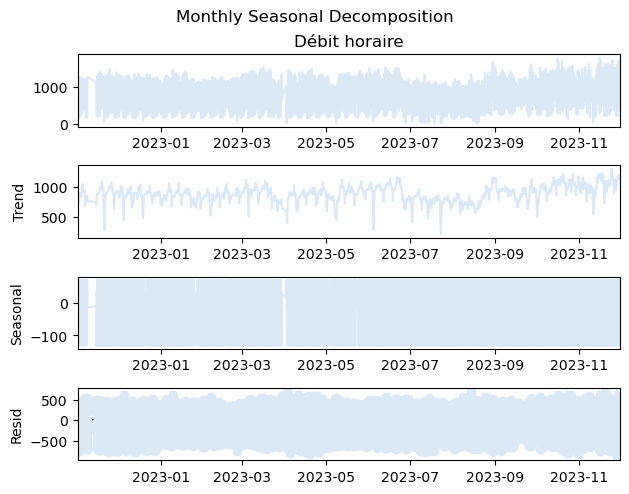

In [39]:

result = seasonal_decompose(df_champs["Débit horaire"], model='additive', period=24)  # Assuming daily seasonality

# Increase figsize
plt.figure(figsize=(16, 30))  # Adjust the width and height as needed
result.plot()
plt.suptitle('Monthly Seasonal Decomposition', y=1.02)  # Adjust the vertical position of the title
plt.show()


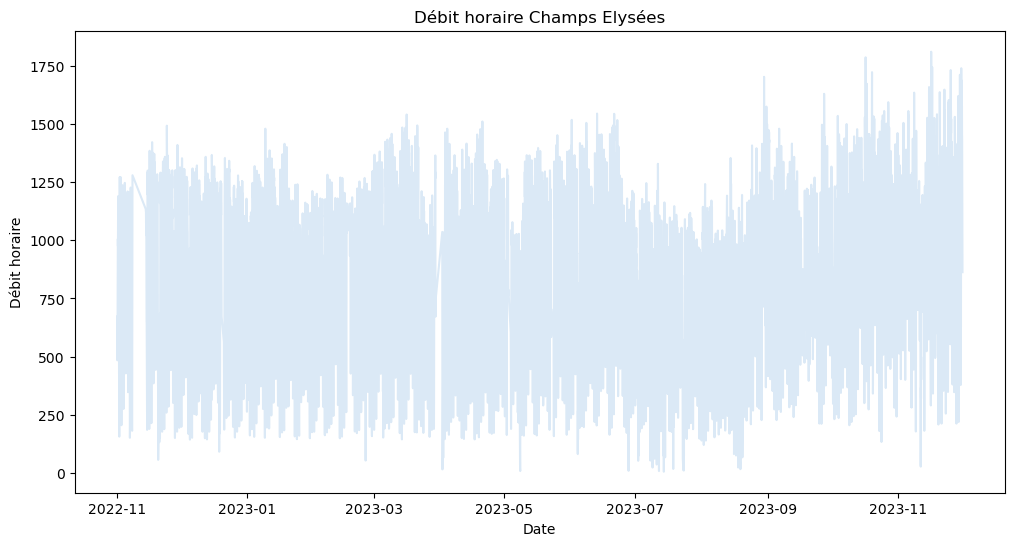

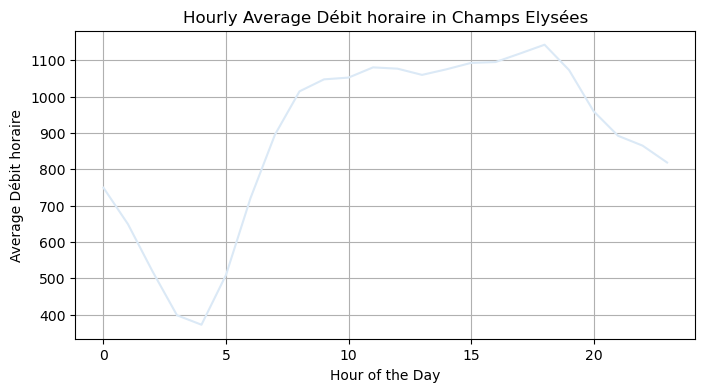

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df_champs['Débit horaire'])
plt.title('Débit horaire Champs Elysées')
plt.xlabel('Date')
plt.ylabel('Débit horaire')
plt.show()

# Hourly Average Plot
hourly_avg = df_champs.groupby(df_champs.index.hour)['Débit horaire'].mean()
plt.figure(figsize=(8, 4))
plt.plot(hourly_avg)
plt.title('Hourly Average Débit horaire in Champs Elysées')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Débit horaire')
plt.grid(True)

plt.show()


In [44]:
def make_time_series_plot(data,var):
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.lineplot(data=data, y=var, x='Date et heure de comptage', ax=ax)
    start = data.head(1)['Date et heure de comptage']
    end = data.tail(1)['Date et heure de comptage']
    ax.set_title(f'{var}  from {start.dt.day.iloc[0]}-{start.dt.month.iloc[0]}-{start.dt.year.iloc[0]}- 03:00 to {end.dt.day.iloc[0]}-{end.dt.month.iloc[0]}-{end.dt.year.iloc[0]}- 23:00', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

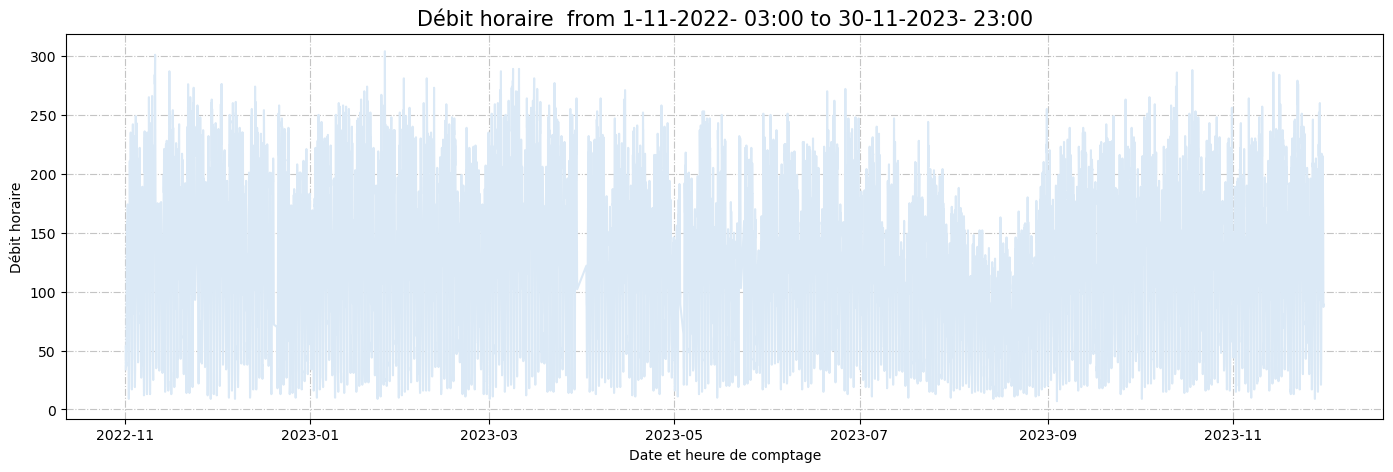

In [45]:
make_time_series_plot(convention,'Débit horaire')

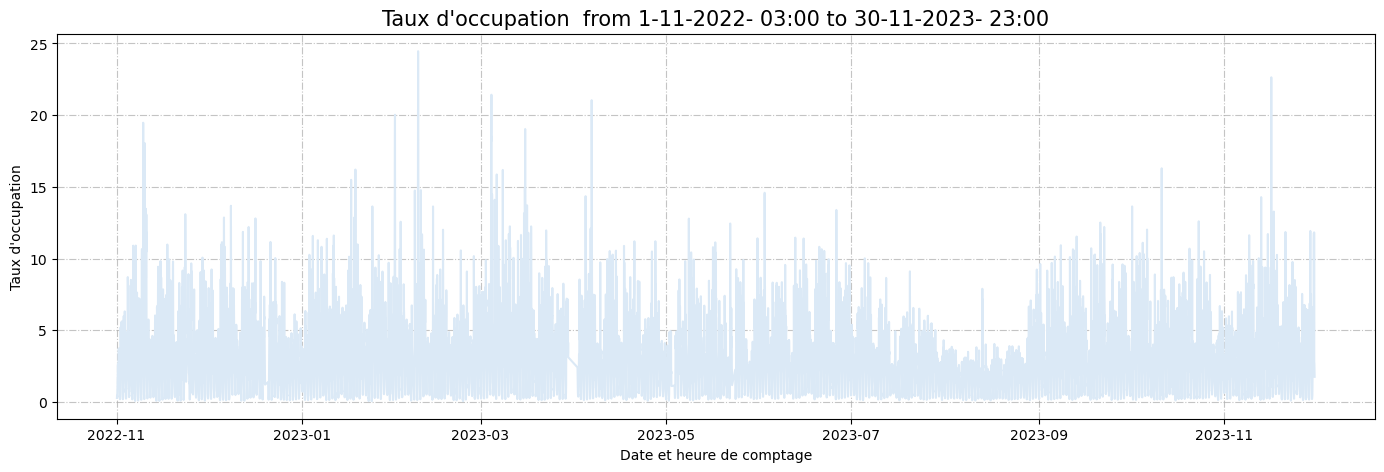

In [46]:
make_time_series_plot(convention,"Taux d'occupation")

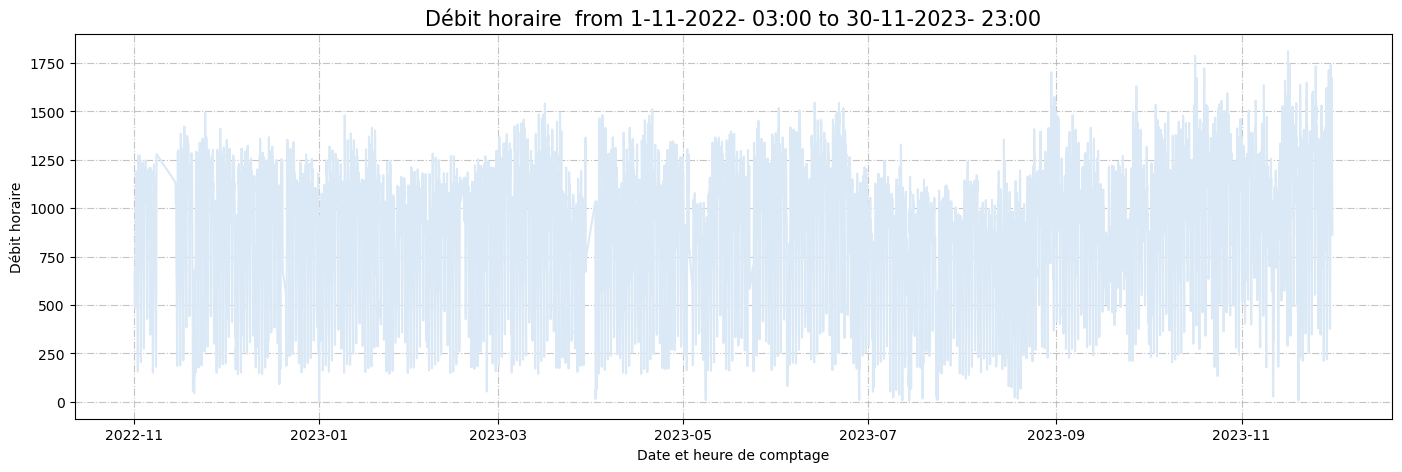

In [47]:
make_time_series_plot(champs_elysees,'Débit horaire')

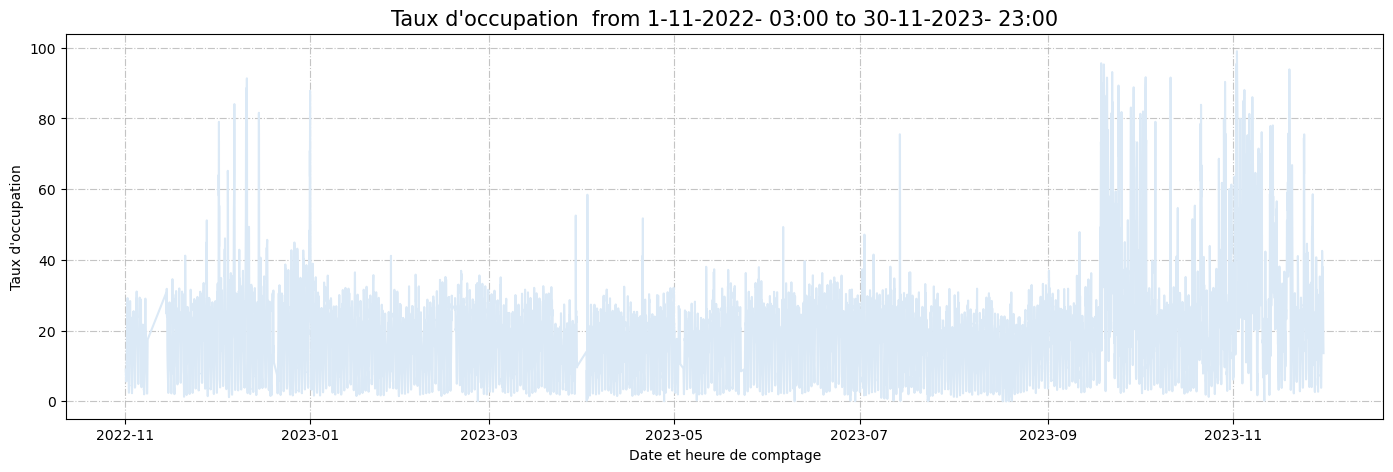

In [48]:
make_time_series_plot(champs_elysees,"Taux d'occupation")

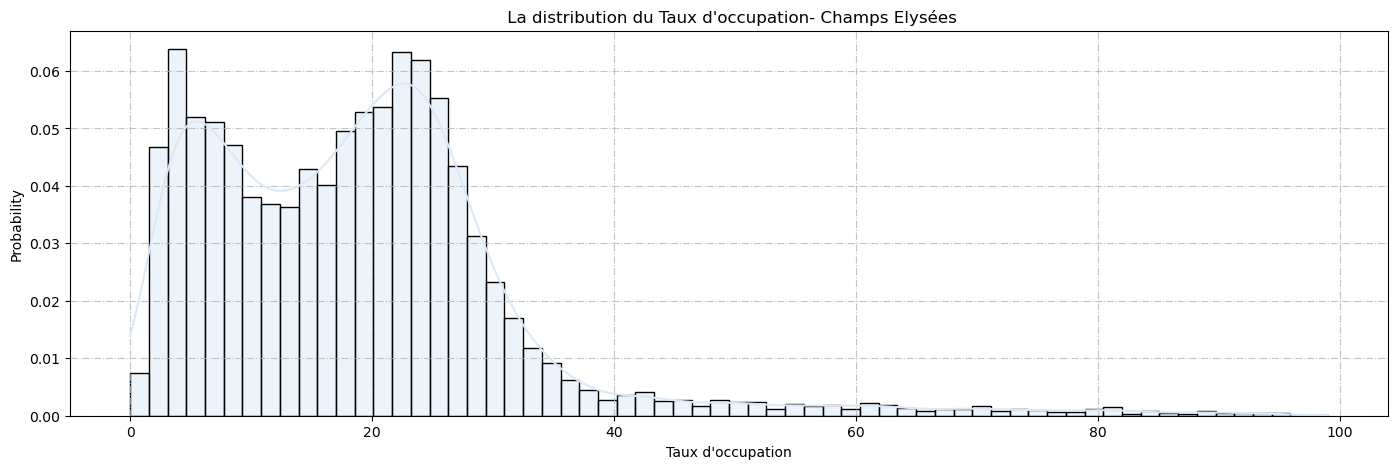

In [49]:
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(champs_elysees["Taux d'occupation"], kde=True, stat='probability')
ax.set_title(" La distribution du Taux d'occupation- Champs Elysées")
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

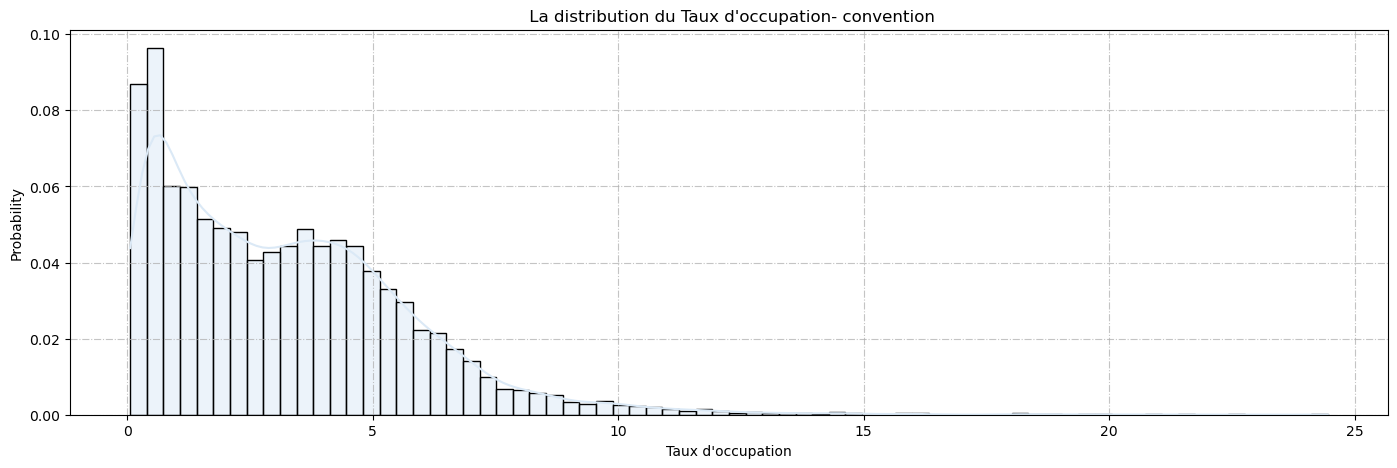

In [50]:
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(convention["Taux d'occupation"], kde=True, stat='probability')
ax.set_title(" La distribution du Taux d'occupation- convention")
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

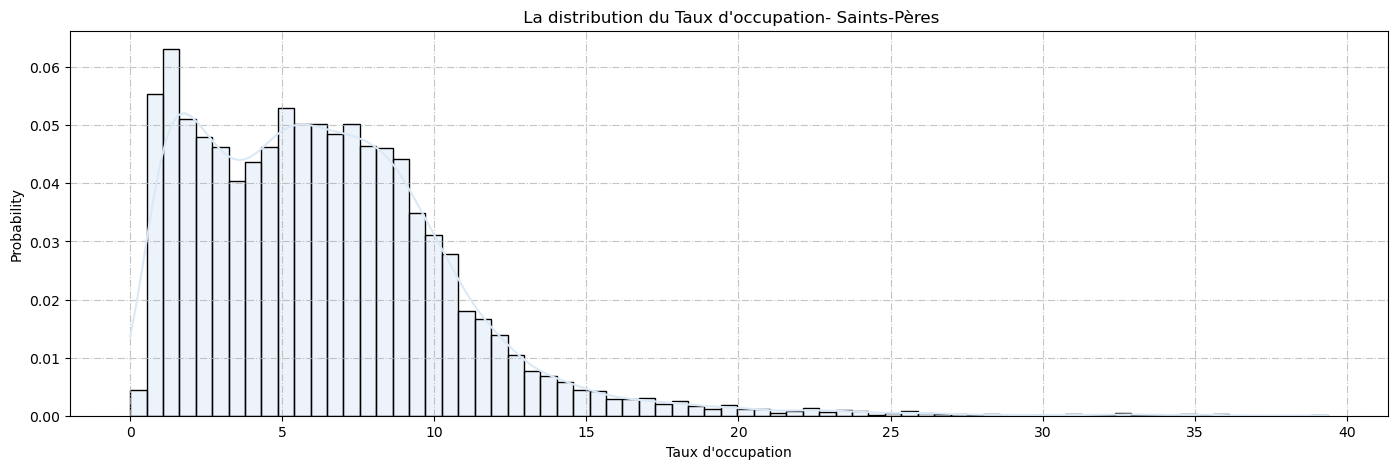

In [51]:
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(sts["Taux d'occupation"], kde=True, stat='probability')
ax.set_title(" La distribution du Taux d'occupation- Saints-Pères")
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

# ARMA

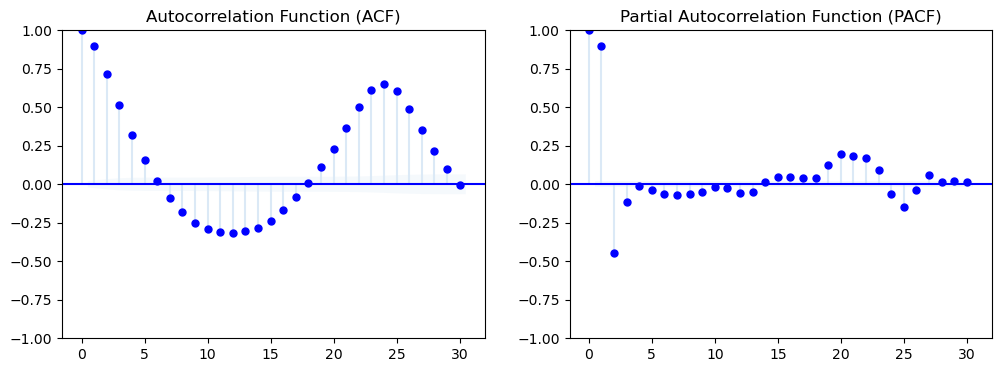

In [118]:
import statsmodels.api as sm

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sm.graphics.tsa.plot_acf(df_champs["Débit horaire"].dropna(), lags=30, ax=ax[0], color='blue')
ax[0].set_title('Autocorrelation Function (ACF)')

sm.graphics.tsa.plot_pacf(df_champs["Débit horaire"].dropna(), lags=30, ax=ax[1], color='blue')
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [120]:
order = (5, 0,0)  # ARMA(p, q)
arma_model = sm.tsa.ARIMA(df_champs["Débit horaire"].dropna(), order=order)
arma_result = arma_model.fit()

# Display model summary
print(arma_result.summary())

c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Débit horaire   No. Observations:                 9026
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -57121.610
Date:                Tue, 05 Dec 2023   AIC                         114257.220
Time:                        13:36:42   BIC                         114306.975
Sample:                             0   HQIC                        114274.148
                               - 9026                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        885.4251      8.250    107.324      0.000     869.255     901.595
ar.L1          1.2441      0.009    142.016      0.000       1.227       1.261
ar.L2         -0.3033      0.014    -22.041      0.0

In [104]:
"""max_lag = 1  # Adjust the maximum lag value based on your analysis
for lag in range(1, max_lag + 1):
    champs[f"Taux d'occupation_T-{lag}"] = champs["Taux d'occupation"].shift(lag)
    champs[f"Débit horaire_T-{lag}"] = champs["Débit horaire"].shift(lag)
# Drop rows with NaN values due to the lag

champs.dropna(inplace=True)

# Define X and y
X = champs[[f"Taux d'occupation_T-{lag}" for lag in range(1,max_lag+1)]+[f"Débit horaire_T-{lag}" for lag in range(1,max_lag+1)]]
y = champs[["Taux d'occupation",'Débit horaire']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize features if necessary (especially for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

"""

# LSTM

In [102]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df_champs.drop('week',axis=1,inplace=True)
df_champs.drop('year',axis=1,inplace=True)


In [131]:
df_champs

,Taux d'occupation,Débit horaire,day_of_week,month,year,hour
Date et heure de comptage,,,,,,
2022-11-01 03:00:00+00:00,8.89223,672.0,5,11,2022,3
2022-11-01 04:00:00+00:00,7.12889,513.0,5,11,2022,4
2022-11-01 05:00:00+00:00,6.22500,494.0,5,11,2022,5
2022-11-01 06:00:00+00:00,5.80723,513.0,5,11,2022,6
2022-11-01 07:00:00+00:00,5.57111,484.0,5,11,2022,7
...,...,...,...,...,...,...
2023-11-30 19:00:00+00:00,30.87000,1433.0,4,11,2023,19
2023-11-30 20:00:00+00:00,24.38111,1253.0,4,11,2023,20
2023-11-30 21:00:00+00:00,20.40723,1069.0,4,11,2023,21


In [135]:
from copy import deepcopy

df_champs_scaled=deepcopy(df_champs)
df_champs_scaled.drop('year',axis=1,inplace=True)
encoder = LabelEncoder()
df_champs_scaled['day_of_week'] = encoder.fit_transform(df_champs_scaled['day_of_week'])
df_champs_scaled['day_of_week'] = encoder.fit_transform(df_champs_scaled['day_of_week'])

scaler = RobustScaler()
df_champs_scaled['Débit horaire'] = scaler.fit_transform(df_champs_scaled[['Débit horaire']])
df_champs_scaled['Taux d\'occupation'] = scaler.fit_transform(df_champs_scaled[['Taux d\'occupation']])

#df['Taux d\'occupation_lag_1'] = df['Taux d\'occupation'].shift(1)  # Create a lag feature
df_champs_scaled.dropna(inplace=True)
# Split the data into training and testing sets
train_size = int(len(df_champs_scaled) * 0.8)
train, test = df_champs_scaled[:train_size], df_champs_scaled[train_size:]

seq_length = 24   # input i = le jour i (24 heures)

# predicting the next 4 days
forecast_horizon = 4*24

def create_sequences(data, seq_length, forecast_horizon,var):
    X = []
    y = []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+forecast_horizon][var])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train, seq_length, forecast_horizon,var='Débit horaire') 
X_test, y_test = create_sequences(test, seq_length, forecast_horizon,var='Débit horaire')

In [137]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 5)))
model.add(Dense(units=forecast_horizon))  

model.compile(optimizer='adam', loss='mean_squared_error')

cp = ModelCheckpoint('model/', save_best_only=True)
model.fit(X_train, y_train, epochs=20, batch_size=32, callbacks=[cp], validation_split=0.1)
y_pred = model.predict(X_test)

# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, forecast_horizon))
y_test = scaler.inverse_transform(y_test.reshape(-1, forecast_horizon))

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

Epoch 1/20
198/200 [============================>.] - ETA: 0s - loss: 0.3935INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 8s 30ms/step - loss: 0.3927 - val_loss: 0.2464
Epoch 2/20
198/200 [============================>.] - ETA: 0s - loss: 0.2674INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 5s 26ms/step - loss: 0.2674 - val_loss: 0.2262
Epoch 3/20
198/200 [============================>.] - ETA: 0s - loss: 0.2373INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 6s 28ms/step - loss: 0.2373 - val_loss: 0.2186
Epoch 4/20
198/200 [============================>.] - ETA: 0s - loss: 0.2178INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 5s 26ms/step - loss: 0.2176 - val_loss: 0.2115
Epoch 5/20
199/200 [============================>.] - ETA: 0s - loss: 0.2074INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 6s 29ms/step - loss: 0.2075 - val_loss: 0.2030
Epoch 6/20
198/200 [============================>.] - ETA: 0s - loss: 0.2001INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 7s 36ms/step - loss: 0.2004 - val_loss: 0.1998
Epoch 7/20
197/200 [============================>.] - ETA: 0s - loss: 0.1921INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 7s 37ms/step - loss: 0.1920 - val_loss: 0.1958
Epoch 8/20
198/200 [============================>.] - ETA: 0s - loss: 0.1855INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 8s 41ms/step - loss: 0.1854 - val_loss: 0.1902
Epoch 9/20
200/200 [==============================] - ETA: 0s - loss: 0.1797INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 7s 37ms/step - loss: 0.1797 - val_loss: 0.1832
Epoch 10/20
200/200 [==============================] - 4s 22ms/step - loss: 0.1740 - val_loss: 0.1868
Epoch 11/20
200/200 [==============================] - 5s 26ms/step - loss: 0.1708 - val_loss: 0.1875
Epoch 12/20
200/200 [==============================] - ETA: 0s - loss: 0.1668INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 7s 34ms/step - loss: 0.1668 - val_loss: 0.1823
Epoch 13/20
200/200 [==============================] - 5s 25ms/step - loss: 0.1642 - val_loss: 0.1832
Epoch 14/20
200/200 [==============================] - 4s 22ms/step - loss: 0.1623 - val_loss: 0.1840
Epoch 15/20
199/200 [============================>.] - ETA: 0s - loss: 0.1595INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


200/200 [==============================] - 8s 40ms/step - loss: 0.1596 - val_loss: 0.1772
Epoch 16/20
200/200 [==============================] - 5s 24ms/step - loss: 0.1581 - val_loss: 0.1818
Epoch 17/20
200/200 [==============================] - 5s 23ms/step - loss: 0.1568 - val_loss: 0.1852
Epoch 18/20
200/200 [==============================] - 5s 24ms/step - loss: 0.1547 - val_loss: 0.1832
Epoch 19/20
200/200 [==============================] - 4s 19ms/step - loss: 0.1528 - val_loss: 0.1809
Epoch 20/20
53/53 [==============================] - 1s 6ms/step
Mean Squared Error (MSE): 80.54134744222652


MSE avec MinMaxScaler= 320 
MSE avec StanderScaler= 106    ==> we must remove outliers

In [169]:
y_test.shape

(1641, 96)

In [168]:
y_pred.shape

(1641, 96)

## LSTM with no hour outliers in the data

In [165]:

df_champs_scaled=deepcopy(df_champs_no_outliers)
df_champs_scaled.drop('year',axis=1,inplace=True)
encoder = LabelEncoder()
df_champs_scaled['day_of_week'] = encoder.fit_transform(df_champs_scaled['day_of_week'])
df_champs_scaled['day_of_week'] = encoder.fit_transform(df_champs_scaled['day_of_week'])

scaler = RobustScaler()
df_champs_scaled['Débit horaire'] = scaler.fit_transform(df_champs_scaled[['Débit horaire']])
df_champs_scaled['Taux d\'occupation'] = scaler.fit_transform(df_champs_scaled[['Taux d\'occupation']])

#df['Taux d\'occupation_lag_1'] = df['Taux d\'occupation'].shift(1)  # Create a lag feature
df_champs_scaled.dropna(inplace=True)
# Split the data into training and testing sets
train_size = int(len(df_champs_scaled) * 0.8)
train, test = df_champs_scaled[:train_size], df_champs_scaled[train_size:]

seq_length = 24   # input i = le jour i (24 heures)

# predicting the next 4 days
forecast_horizon = 4*24

def create_sequences(data, seq_length, forecast_horizon,var):
    X = []
    y = []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+forecast_horizon][var])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train, seq_length, forecast_horizon,var='Débit horaire') 
X_test, y_test = create_sequences(test, seq_length, forecast_horizon,var='Débit horaire')

In [166]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 5)))
model.add(Dense(units=forecast_horizon))  

model.compile(optimizer='adam', loss='mean_squared_error')

cp = ModelCheckpoint('model/', save_best_only=True)
model.fit(X_train, y_train, epochs=20, batch_size=32, callbacks=[cp], validation_split=0.1)
y_pred = model.predict(X_test)

# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, forecast_horizon))
y_test = scaler.inverse_transform(y_test.reshape(-1, forecast_horizon))

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

Epoch 1/20
194/195 [============================>.] - ETA: 0s - loss: 0.4441INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


195/195 [==============================] - 8s 30ms/step - loss: 0.4438 - val_loss: 0.2867
Epoch 2/20
194/195 [============================>.] - ETA: 0s - loss: 0.3212INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


195/195 [==============================] - 9s 45ms/step - loss: 0.3209 - val_loss: 0.2639
Epoch 3/20
193/195 [============================>.] - ETA: 0s - loss: 0.2988INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


195/195 [==============================] - 7s 38ms/step - loss: 0.2985 - val_loss: 0.2549
Epoch 4/20
195/195 [==============================] - ETA: 0s - loss: 0.2787INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


195/195 [==============================] - 8s 43ms/step - loss: 0.2787 - val_loss: 0.2525
Epoch 5/20
194/195 [============================>.] - ETA: 0s - loss: 0.2649INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


195/195 [==============================] - 7s 38ms/step - loss: 0.2649 - val_loss: 0.2461
Epoch 6/20
195/195 [==============================] - 5s 24ms/step - loss: 0.2528 - val_loss: 0.2586
Epoch 7/20
195/195 [==============================] - 5s 25ms/step - loss: 0.2450 - val_loss: 0.2557
Epoch 8/20
193/195 [============================>.] - ETA: 0s - loss: 0.2362INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


195/195 [==============================] - 5s 27ms/step - loss: 0.2363 - val_loss: 0.2422
Epoch 9/20
195/195 [==============================] - 5s 23ms/step - loss: 0.2296 - val_loss: 0.2423
Epoch 10/20
195/195 [==============================] - 5s 25ms/step - loss: 0.2259 - val_loss: 0.2443
Epoch 11/20
195/195 [==============================] - 4s 23ms/step - loss: 0.2219 - val_loss: 0.2471
Epoch 12/20
195/195 [==============================] - 5s 24ms/step - loss: 0.2188 - val_loss: 0.2637
Epoch 13/20
194/195 [============================>.] - ETA: 0s - loss: 0.2147INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


195/195 [==============================] - 7s 37ms/step - loss: 0.2145 - val_loss: 0.2415
Epoch 14/20
195/195 [==============================] - 4s 21ms/step - loss: 0.2130 - val_loss: 0.2487
Epoch 15/20
195/195 [==============================] - ETA: 0s - loss: 0.2114INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


195/195 [==============================] - 7s 36ms/step - loss: 0.2114 - val_loss: 0.2395
Epoch 16/20
195/195 [==============================] - 5s 24ms/step - loss: 0.2092 - val_loss: 0.2406
Epoch 17/20
195/195 [==============================] - 5s 26ms/step - loss: 0.2062 - val_loss: 0.2578
Epoch 18/20
195/195 [==============================] - 4s 22ms/step - loss: 0.2045 - val_loss: 0.2563
Epoch 19/20
195/195 [==============================] - 4s 22ms/step - loss: 0.2028 - val_loss: 0.2516
Epoch 20/20
52/52 [==============================] - 1s 8ms/step
Mean Squared Error (MSE): 105.05867743441593


Removing outliers increased the MSE of the model..

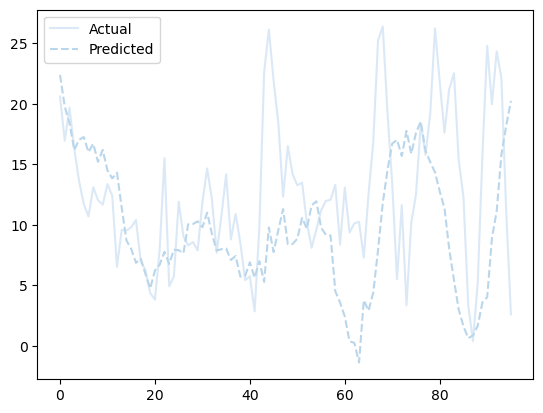

In [106]:
plt.plot(y_test[1], label='Actual')
plt.plot( y_pred[1], label='Predicted', linestyle='--')
plt.legend()
plt.show()

### Exploring other variables (meteo, manif, accidents)

In [110]:
temperature_df=pd.read_csv('./datasets/temperature_daily_df.csv',sep=';')

In [112]:
temperature_df.head(3)

,Unnamed: 0,Jour_name,temp_min,temp_max,precipitation
0,0,01/11/2022,14,18,0.5
1,1,02/11/2022,11,16,0.2
2,2,03/11/2022,13,16,0.6


In [ ]:
df_champs